# Model Testing

## Intructions

Construct a deep neural network. Write a notebook that first implements the data loading process of the two .csv files: attributes and classes. Then, split the dataset into three partitions: 80% for training, 10% for development testing, and the remaining 10% for final testing purposes. Finally, follow the deep-neural-network construction process to find the neural architecture and other hyperparameters that achieve the best performance in classification accuracy. 

Consider a Bayesian error of 5% (minimum error); i.e., the human error that hotel managers (experts) make when predicting if customers will cancel their bookings. You can use the notebook that implements the deep neural model in Keras to estimate the median house value studied in class as a starting point for this task. Note that we are dealing with a binary classification problem, therefore, we only need one output neuron with the Sigmoid activation function. Moreover, the loss function should be the binary crossentropy and the binary accuracy as a metric.

Links :
* [Keras Metrics](https://keras.io/api/metrics/)
* [Keras Activations](https://keras.io/api/layers/activations/)
* [Keras Losses](https://keras.io/api/losses/)
* [Keras Initializers](https://keras.io/api/layers/initializers/)

## Next steps

Idea : poner poco dropout en la primeras capas y subir en las siguientes

Coger el modelo de Sergio y cambiar lo un poco

Chacun écrit un peu ce qu'il a fait

Paul : Faire la présentation du projet, le problème qu'il représente etc

Idea : add layer normalization and tweak it

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
abs_path = '/Users/paul/Library/Mobile Documents/com~apple~CloudDocs/Professionnel/GI05/A6 - NN and DL/Project_Units_1-2/DL/data/prep/'

df_x = pd.read_csv(abs_path + 'HotelReservationsPreparedCleanX.csv')
df_t = pd.read_csv(abs_path + 'HotelReservationsY.csv')

In [3]:
seed = 0

In [4]:
df_x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.0,-0.6,-1.000000,-0.882353,-1.0,1.0,-1.0,-0.990971,0.454545,-0.933333,0.0,-1.0,-1.0,-1.0,-0.044444,-0.6
1,0.0,-1.0,-1.000000,-0.764706,0.0,-1.0,0.0,-0.823928,0.272727,-0.133333,-1.0,-1.0,-1.0,-1.0,-0.624074,-1.0
2,0.0,-1.0,-0.428571,-0.764706,-1.0,-1.0,0.0,-0.936795,1.000000,0.733333,0.0,-1.0,-1.0,-1.0,-0.603704,-1.0
3,0.0,-1.0,-1.000000,-0.882353,0.0,-1.0,0.0,-0.548533,0.636364,0.000000,-1.0,-1.0,-1.0,-1.0,-0.600000,-1.0
4,-0.5,-1.0,-1.000000,-0.882353,0.0,-1.0,0.0,-0.002257,0.272727,-0.266667,-1.0,-1.0,-1.0,-1.0,-0.729630,-1.0


In [5]:
df_t.head()

,booking_status
0,1
1,1
2,1
3,0
4,1


In [6]:
df = pd.concat([df_x, df_t], axis = 1)
df = shuffle(df, random_state=seed)
X_train, X_test, t_train, t_test = train_test_split(df_x, df_t, stratify=df_t, test_size=0.2, random_state=seed)
X_test, X_val, t_test, t_val = train_test_split(X_test, t_test, stratify=t_test, test_size=0.5, random_state=seed)

input_shape = X_train.shape[1]
output_shape = t_train.shape[1]

print(X_train.shape)
print(t_train.shape)
print(X_val.shape)
print(t_val.shape)

(29016, 16)
(29016, 1)
(3627, 16)
(3627, 1)


In [7]:
def compute_ovefitting(history, range=5):
    res_df = pd.DataFrame(history.history)
    bin_ac = res_df['binary_accuracy'][-range:]
    val_bin_ac = res_df['val_binary_accuracy'][-range:]
    overfitting = bin_ac - val_bin_ac
    total_ov = 0
    for item in overfitting:
        total_ov += item
    return total_ov/range


## Attempt 8

In [7]:
# from keras.models import Sequential

# model = Sequential(name='Model8')

# model.add(keras.layers.Input(shape=input_shape))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu, 
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu, 
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
#                              kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
# model.summary()

Best performance : 88%

In [8]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
#               metrics=keras.metrics.binary_accuracy)

In [9]:
# from playsound import playsound
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [10]:
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

## Attempt 9

In [11]:
# from keras.models import Sequential

# model = Sequential(name='Model8')

[1024,1024,1024,1024] -> elu training:93 validation:86 epoch:40, fine-tuning:20

# model.add(keras.layers.Input(shape=input_shape))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
#                              kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
# model.summary()

In [12]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
#               metrics=keras.metrics.binary_accuracy)

In [13]:
# from playsound import playsound
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [14]:
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [15]:
# results = pd.DataFrame(history.history)
# results.plot(figsize=(8, 5))
# plt.grid(True)
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy - Mean Log Loss")
# plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
# plt.show()

Maybe should have started fine-tuning here?

In [16]:
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

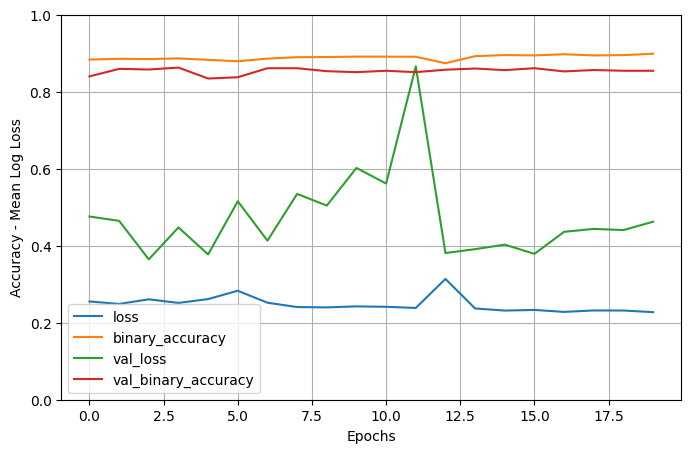

Acheived : accuracy : 0.898608      val_accuracy : 0.854425

### Fine-tuning 1

In [17]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
#               metrics=keras.metrics.binary_accuracy)

In [18]:
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

Acheived : accuracy : 0.936966         val_accuracy : 0.861869

High overfitting -> Add dropout

In [19]:
# results = pd.DataFrame(history.history)
# results.plot(figsize=(8, 5))
# plt.grid(True)
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy - Mean Log Loss")
# plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
# plt.show()

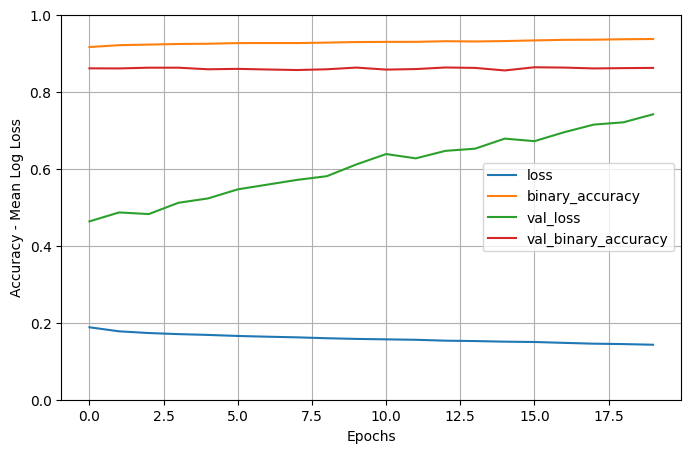

## Attempt 10

In [20]:
# from keras.models import Sequential

# model = Sequential(name='Model10')

# model.add(keras.layers.Input(shape=input_shape))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=1024,
#                              activation=keras.activations.elu,
#                              kernel_initializer=keras.initializers.HeNormal(seed=seed)))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
#                              kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
# model.summary()

In [21]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
#               metrics=keras.metrics.binary_accuracy)

In [22]:
# from playsound import playsound
# history = model.fit(X_train, t_train, batch_size=32, epochs=15, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [23]:
# results = pd.DataFrame(history.history)
# results.plot(figsize=(8, 5))
# plt.grid(True)
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy - Mean Log Loss")
# plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
# plt.show()

### Fine-tuning : $\frac{\alpha}{10}$

In [24]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
#               metrics=keras.metrics.binary_accuracy)

In [25]:
# from playsound import playsound
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [26]:
# results = pd.DataFrame(history.history)
# results.plot(figsize=(8, 5))
# plt.grid(True)
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy - Mean Log Loss")
# plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
# plt.show()

### Fine-tuning : $\frac{\alpha}{100}$

In [27]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
#               metrics=keras.metrics.binary_accuracy)

In [28]:
# from playsound import playsound
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [29]:
# results = pd.DataFrame(history.history)
# results.plot(figsize=(8, 5))
# plt.grid(True)
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy - Mean Log Loss")
# plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
# plt.show()

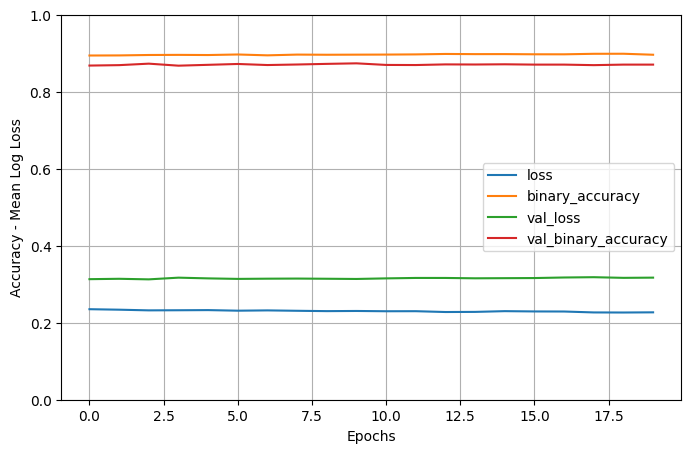

In [30]:
# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.000001),
#               metrics=keras.metrics.binary_accuracy)

In [31]:
# from playsound import playsound
# history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
#     X_val, t_val))
# logs = pd.DataFrame(history.history)
# playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
# logs

In [32]:
# results = pd.DataFrame(history.history)
# results.plot(figsize=(8, 5))
# plt.grid(True)
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy - Mean Log Loss")
# plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
# plt.show()

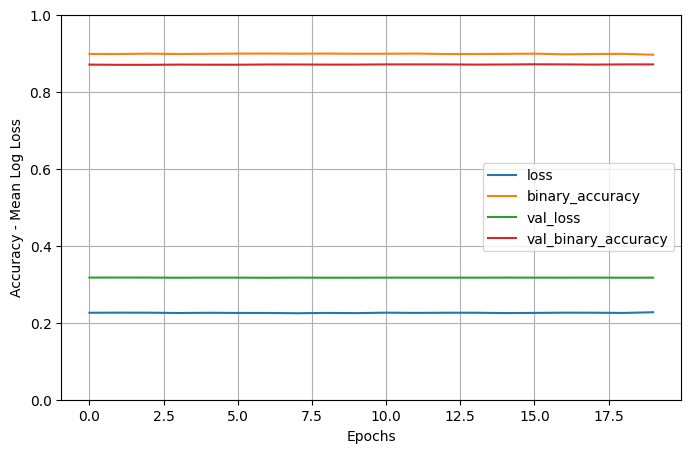

Accuracy : 0.896126     Val_accuracy : 0.870968

## Attempt 11

from keras.models import Sequential

model = Sequential(name='Model10')

model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             kernel_regularizer=keras.regularizers.l2(0.0005)))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             kernel_regularizer=keras.regularizers.l2(0.0005)))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             kernel_regularizer=keras.regularizers.l2(0.0005)))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             kernel_regularizer=keras.regularizers.l2(0.0005)))
model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.summary()

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

from playsound import playsound
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

a = 0.814413	        v_a = 0.801765

Idea : Increase kernel regularization and increase epochs 

results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

### $\alpha_2 = \frac{\alpha_1}{10}$

model.compile(optimizer=keras.optimizers.legacy.Adam(0.0001),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

from playsound import playsound
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

a = 0.819927        v_a = 0.808933

results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

### $\alpha_3 = \alpha_1$

model.compile(optimizer=keras.optimizers.legacy.Adam(0.001),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

from playsound import playsound
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

a = 0.817928        v_a = 0.810312

results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

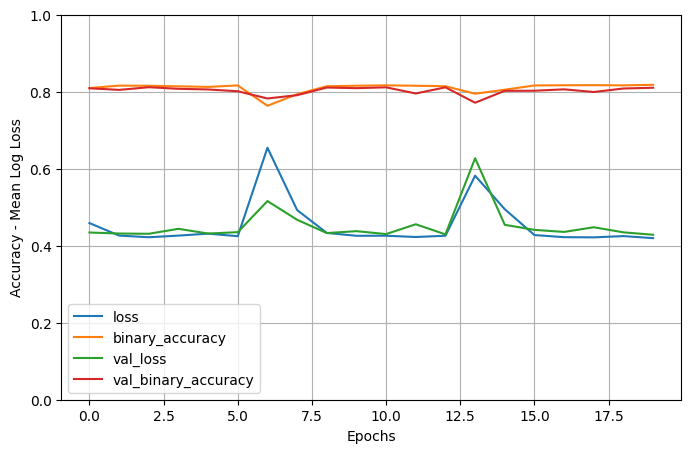

## Attempt 12

In [33]:
from keras.models import Sequential

model = Sequential(name='Model10')

model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(units=1280,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1280,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1280,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1280,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.summary()

Model: "Model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1280)              21760     
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 1280)              1639680   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 1280)              1639680   
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 1280)              1639

2023-11-14 17:14:48.020483: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-14 17:14:48.020530: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-14 17:14:48.020539: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-14 17:14:48.020859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-14 17:14:48.020892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [34]:
model.compile(loss=keras.losses.binary_crossentropy,
               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
               metrics=keras.metrics.binary_accuracy)

In [35]:
from playsound import playsound
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

2023-11-14 17:15:12.393871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-14 17:15:31.080276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.556236,0.770299,0.522869,0.723463
1,0.439416,0.792528,0.411617,0.802316
2,0.413420,0.808002,0.438317,0.784946
3,0.407451,0.814447,0.435602,0.785498
4,0.406593,0.815171,0.410797,0.804797
5,0.387832,0.819996,0.373119,0.829611
6,0.375265,0.832506,0.365948,0.830163
7,0.366573,0.837814,0.372371,0.827130
8,0.359826,0.842225,0.441023,0.791563
9,0.357492,0.839744,0.360056,0.840088


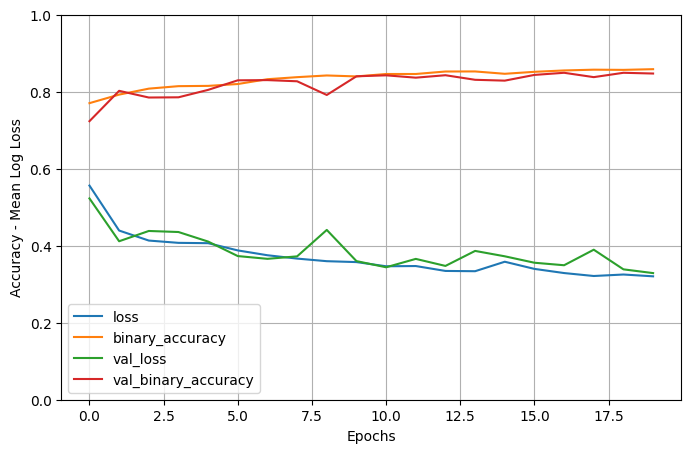

In [36]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [37]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=keras.metrics.binary_accuracy)

In [38]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

2023-11-14 17:38:58.888437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-14 17:39:16.203036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.284407,0.875482,0.319004,0.856079
1,0.276435,0.877171,0.321929,0.860215
2,0.273524,0.880101,0.323676,0.859939
3,0.269893,0.879997,0.328426,0.856355
4,0.267990,0.879549,0.336434,0.852219
5,0.267003,0.882237,0.329683,0.858009
6,0.263372,0.883065,0.327662,0.861869
7,0.261235,0.882548,0.335511,0.856079
8,0.261470,0.883685,0.326393,0.864075
9,0.258803,0.884064,0.333270,0.861042


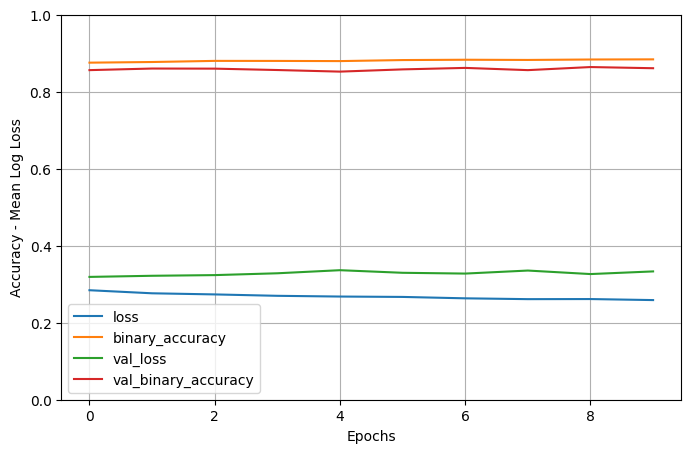

In [39]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [40]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)

In [41]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

2023-11-14 17:43:14.709412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-14 17:43:32.453071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.253006,0.887028,0.326715,0.861594
1,0.251551,0.887510,0.328010,0.863248
2,0.251141,0.887441,0.328983,0.864075
3,0.250170,0.887821,0.326905,0.862145
4,0.250773,0.887683,0.329107,0.864626
5,0.250579,0.887579,0.328490,0.862145
6,0.249189,0.889199,0.328362,0.863799
7,0.248416,0.888475,0.330369,0.863799
8,0.250034,0.887924,0.329911,0.862972
9,0.248490,0.889888,0.329796,0.863524


In [49]:
compute_ovefitting(history)

2.536531686782837

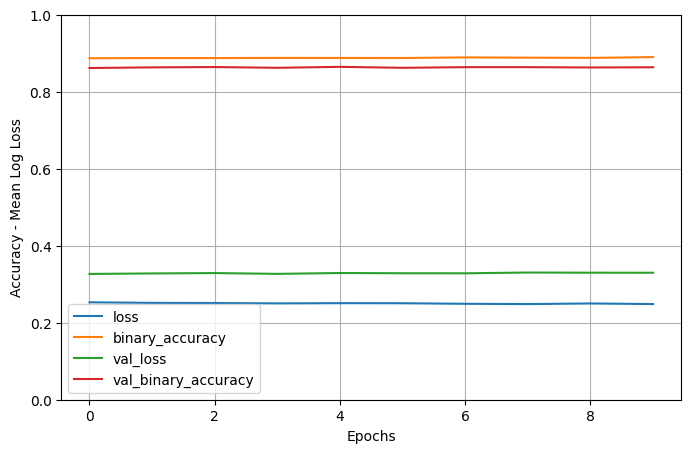

In [42]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

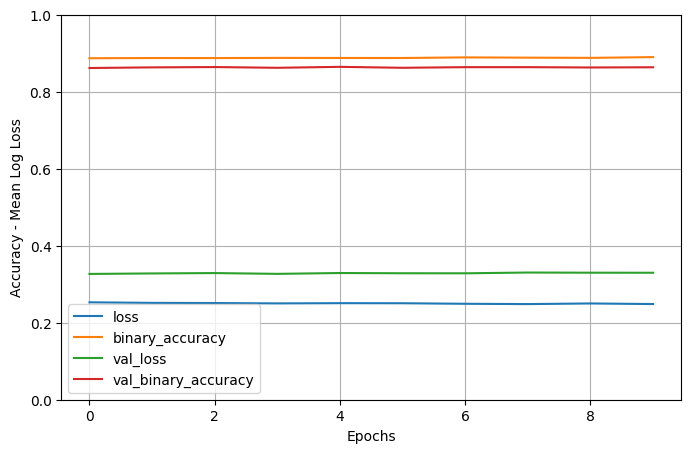

## Attempt 13

IDEA : Increase model size to 1500 perceptrons per layer?

In [8]:
from keras.models import Sequential

model = Sequential(name='Model10')

model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(units=1536,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(units=1536,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense( units=1536,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(units=1536,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.summary()

Model: "Model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1536)              26112     
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense_1 (Dense)             (None, 1536)              2360832   
                                                                 
 dropout_1 (Dropout)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 1536)              2360832   
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 dense_3 (Dense)             (None, 1536)              2360

2023-11-14 18:20:24.141628: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-14 18:20:24.141649: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-14 18:20:24.141653: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-14 18:20:24.141679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-14 18:20:24.141693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [10]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)


2023-11-14 18:20:24.745140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-14 18:20:45.243185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.539632,0.765336,0.430039,0.793493
1,0.441936,0.791839,0.430670,0.785222
2,0.430663,0.798835,0.417000,0.800110
3,0.420007,0.806762,0.387349,0.810312
4,0.403814,0.814171,0.377738,0.822719
5,0.388165,0.824821,0.369048,0.827957
6,0.385972,0.827578,0.534490,0.839261
7,0.399570,0.824373,0.359631,0.833471
8,0.369266,0.835815,0.430374,0.802040
9,0.360830,0.838985,0.379280,0.828784


In [11]:
compute_ovefitting(history)

0.40115833282470703

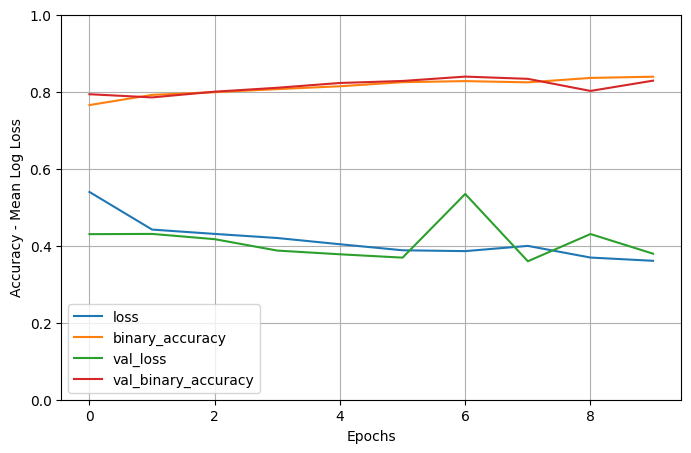

In [12]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [13]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=keras.metrics.binary_accuracy)

In [14]:
history = model.fit(X_train, t_train, batch_size=32, epochs=5, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-14 18:23:50.198978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-14 18:24:09.534438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.316166,0.860422,0.332404,0.846981
1,0.308173,0.863627,0.331518,0.852219
2,0.304395,0.866143,0.331053,0.854149
3,0.303661,0.866177,0.329580,0.850014
4,0.296792,0.868348,0.330817,0.857182
5,0.296662,0.868245,0.329901,0.853598
6,0.293836,0.869245,0.331455,0.849462
7,0.292198,0.870106,0.326988,0.854701
8,0.288897,0.869107,0.340618,0.850014
9,0.287274,0.871588,0.337806,0.856631


In [17]:
compute_ovefitting(history, range=10)

1.4805620908737183

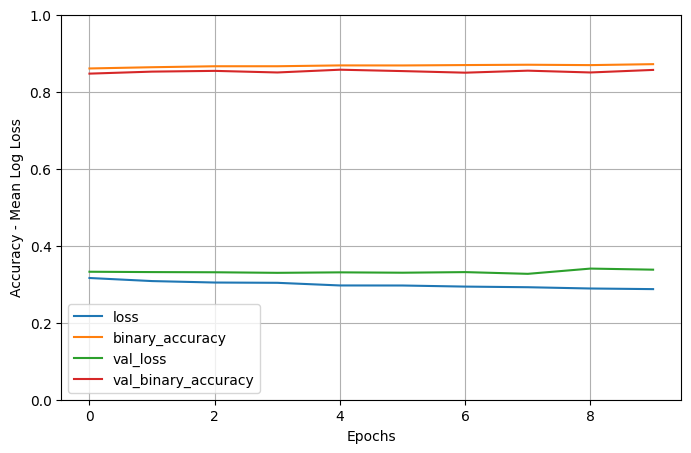

In [15]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [30]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=.00001),
              metrics=keras.metrics.binary_accuracy)

In [31]:
history = model.fit(X_train, t_train, batch_size=32, epochs=30, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-14 18:54:23.505023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-14 18:54:43.940190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.272788,0.877344,0.344272,0.859664
1,0.273143,0.879342,0.344311,0.857458
2,0.271498,0.877585,0.340963,0.859388
3,0.272709,0.877723,0.342736,0.860215
4,0.271003,0.878136,0.344126,0.859112
5,0.271090,0.878205,0.344045,0.861042
6,0.271379,0.877447,0.343400,0.858285
7,0.270638,0.878343,0.342260,0.858837
8,0.269878,0.878757,0.342645,0.861042
9,0.269391,0.879756,0.344838,0.862972


In [32]:
compute_ovefitting(history)

1.899641752243042

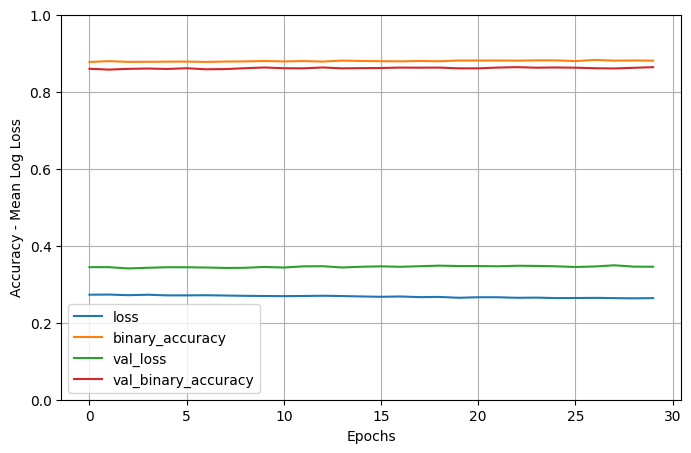

In [33]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

## Attempt 14


In [8]:
from keras.models import Sequential

model = Sequential(name='Model10')

model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(units=2048,
                             activation=keras.activations.relu,
                             kernel_initializer=keras.initializers.HeUniform(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=2048,
                             activation=keras.activations.elu,
                             kernel_initializer=keras.initializers.HeUniform(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=1536,
                             activation=keras.activations.swish,
                             kernel_initializer=keras.initializers.GlorotUniform(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=1024,
                             activation=keras.activations.relu,
                             kernel_initializer=keras.initializers.HeUniform(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.summary()

2023-11-16 16:24:53.415007: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 16:24:53.415036: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-16 16:24:53.415043: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-16 16:24:53.415555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 16:24:53.415967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "Model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              34816     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                          

In [9]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [10]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-16 16:25:06.387565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 16:25:30.773812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.505083,0.767887,0.414786,0.799559
1,0.437108,0.799007,0.404321,0.814171
2,0.420847,0.805245,0.416278,0.812517
3,0.408263,0.811759,0.401711,0.807554
4,0.402362,0.817377,0.384025,0.824648
5,0.396338,0.820237,0.386513,0.816101
6,0.385935,0.824580,0.374912,0.825200
7,0.383562,0.826647,0.369939,0.834298
8,0.381212,0.829163,0.364844,0.834023
9,0.374239,0.831197,0.372133,0.829887


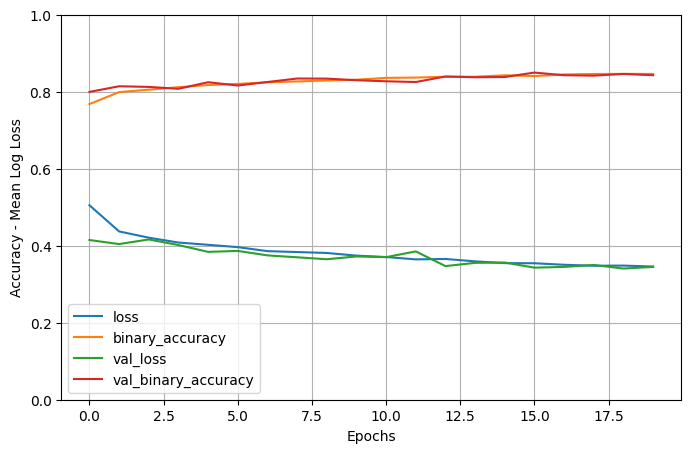

In [11]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [12]:
compute_ovefitting(history)

0.00016541481018066405

In [13]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=keras.metrics.binary_accuracy)

In [14]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-16 16:33:49.070509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 16:34:13.490141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.333104,0.854080,0.337951,0.842018
1,0.328182,0.856321,0.338186,0.844775
2,0.323847,0.857044,0.332862,0.846430
3,0.319116,0.859285,0.331945,0.848635
4,0.318889,0.861594,0.332922,0.850290
5,0.319554,0.861146,0.332641,0.848911
6,0.316878,0.861938,0.336302,0.846430
7,0.316276,0.861973,0.335133,0.849187
8,0.316625,0.862559,0.335040,0.849462
9,0.311699,0.863661,0.339586,0.849738


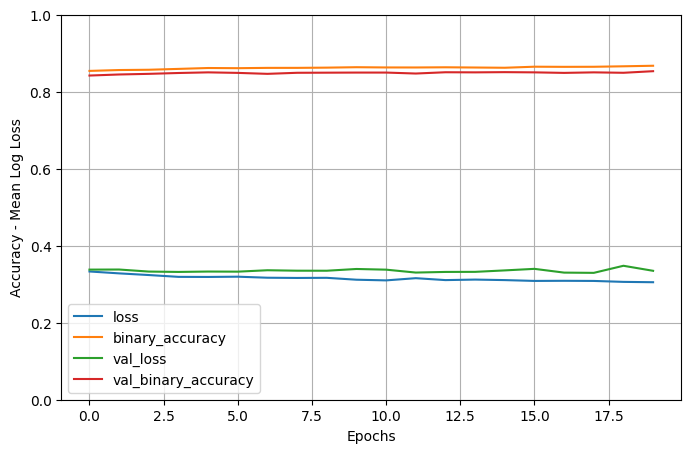

In [15]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [16]:
compute_ovefitting(history)

0.01517782211303711

In [17]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.000005),
              metrics=keras.metrics.binary_accuracy)

In [18]:
history = model.fit(X_train, t_train, batch_size=64, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-16 16:45:04.173590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 16:45:18.578125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.292791,0.872829,0.323803,0.856907
1,0.288908,0.874138,0.321065,0.856631
2,0.289342,0.875276,0.320025,0.857734
3,0.289971,0.874207,0.324044,0.857182
4,0.289293,0.874345,0.322103,0.856631
5,0.290614,0.874586,0.321914,0.854701
6,0.286926,0.874483,0.321242,0.856079
7,0.289279,0.872794,0.321322,0.855804
8,0.290698,0.872553,0.320989,0.856079
9,0.287726,0.873828,0.319642,0.856079


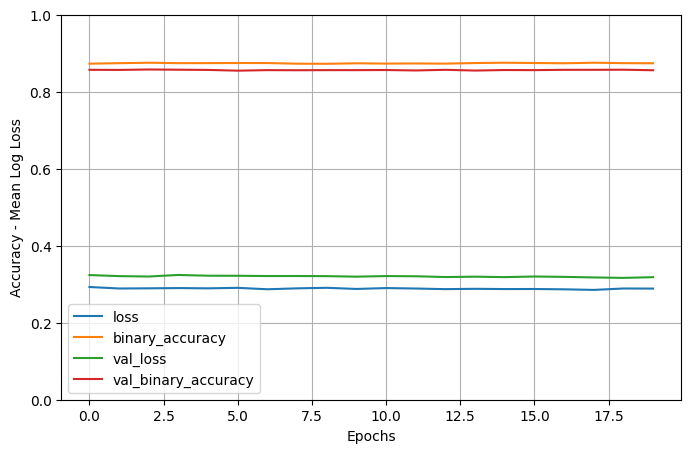

In [19]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [20]:
compute_ovefitting(history)

0.01779707670211792

## Attempt 15

Using `ReLU` at the entry layer can be a problem because it may return 0 for negative values. 

Perhaps, use a `sigmoid` function as an entry layer to remove negative values?

In [9]:
from keras.models import Sequential

model = Sequential(name='Model15')
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(units=2048,
                             activation=keras.activations.swish,
                             kernel_initializer=keras.initializers.HeUniform(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=2048,
                             activation=keras.activations.swish,
                             kernel_initializer=keras.initializers.HeUniform(seed=seed)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.summary()

2023-11-16 19:42:18.572121: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 19:42:18.572157: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-16 19:42:18.572164: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-16 19:42:18.572508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 19:42:18.572916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "Model15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              34816     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                          

In [10]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [11]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-16 19:42:42.400570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 19:42:57.790291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.519034,0.773746,0.442280,0.795147
1,0.435830,0.795733,0.413543,0.806727
2,0.422367,0.806210,0.416822,0.807279
3,0.408794,0.812345,0.393657,0.818031
4,0.401511,0.816412,0.391280,0.819961
5,0.397487,0.819858,0.376589,0.826578
6,0.393221,0.820926,0.380017,0.825476
7,0.383185,0.828198,0.375488,0.826303
8,0.380492,0.829956,0.374784,0.826578
9,0.372079,0.835711,0.371614,0.826578


In [14]:
compute_ovefitting(history)

0.005121302604675293

In [12]:
from playsound import playsound
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')

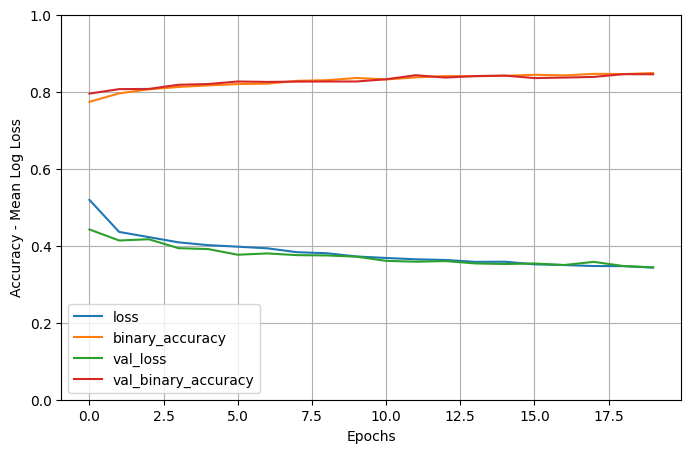

In [13]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [16]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=keras.metrics.binary_accuracy)

In [17]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-16 19:59:39.335855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 19:59:53.373600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.330486,0.853184,0.339062,0.844775
1,0.323772,0.855666,0.336535,0.845878
2,0.323335,0.857113,0.334164,0.849462
3,0.322922,0.858664,0.335721,0.846981
4,0.317913,0.860146,0.333766,0.848084
5,0.321973,0.860146,0.334887,0.847257
6,0.318060,0.860973,0.333415,0.849187
7,0.317284,0.859250,0.332285,0.848635
8,0.316455,0.860456,0.331960,0.848360
9,0.315039,0.861077,0.329931,0.849462


In [18]:
from playsound import playsound
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')

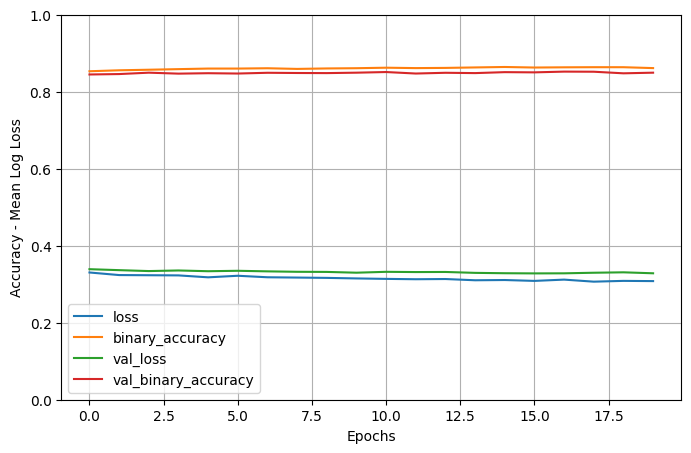

In [19]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [20]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)

In [21]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-16 20:04:54.402205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 20:05:08.295113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.305289,0.864523,0.329491,0.851117
1,0.304480,0.866039,0.328153,0.851668
2,0.303817,0.867177,0.328352,0.851117
3,0.306743,0.864523,0.328074,0.851668
4,0.306568,0.865074,0.328407,0.851668
5,0.304779,0.866867,0.327802,0.851117
6,0.307865,0.864764,0.329400,0.851944
7,0.303346,0.865764,0.328354,0.851117
8,0.306883,0.865316,0.328728,0.850565
9,0.300720,0.866901,0.327375,0.850841


In [22]:
from playsound import playsound
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')

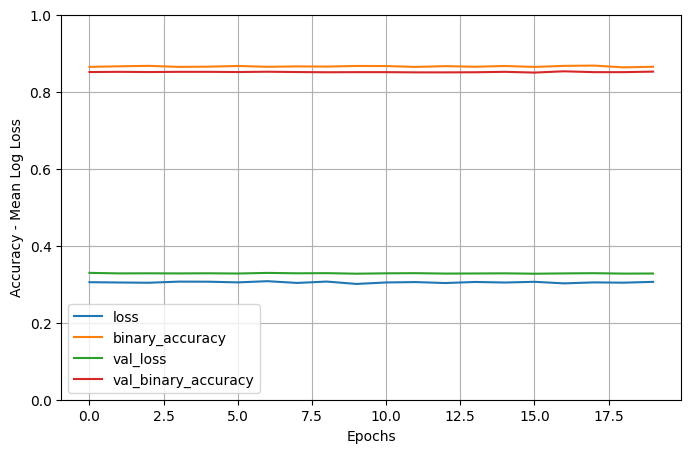

In [23]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

Idea : poner poco dropout en la primeras capas y subir en las siguientes
Coger el modelo de Sergio y cambiar lo un poco

Chacun écrit un peu ce qu'il a fait

Paul : Faire la présentation du projet, le problème qu'il représente etc

Idea : add layer normalization and tweak it

In [ ]:
n_epochs = 100
lr = 0.001
batch_size = 512
tasa_dropout = 0.2
error = 0.01
n_neurons_per_hlayer = [1024, 512, 256, 128, 64, 32, 16]
model = keras.Sequential(name="DeepFeedforward")
model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, kernel_initializer="he_normal",
            use_bias=False, kernel_regularizer=keras.regularizers.l2(lr)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation("elu"))
  model.add(tf.keras.layers.Dropout(tasa_dropout))

model.add(keras.layers.Dense(1, activation="sigmoid",
          kernel_regularizer=keras.regularizers.l2(lr)))
model.summary()
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.savefig(f"./images/loss{n_neurons_per_hlayer}.png")
plt.show()

## Attempt 16

Using Sergio's model

In [8]:
from keras.models import Sequential

model16 = Sequential(name='model_16')

layer_sizes = [1024, 512, 256, 128, 64, 32, 16]
dropout_rates = [0.05, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25]

model16.add(keras.layers.Input(shape=input_shape))

for i, layer_size in enumerate(layer_sizes) :
    model16.add(keras.layers.Dense(units=layer_size,
                                   activation=keras.activations.elu,
                                   kernel_initializer=keras.initializers.HeUniform(seed=seed)))
    model16.add(keras.layers.BatchNormalization())
    model16.add(keras.layers.Dropout(dropout_rates[i]))
model16.add(keras.layers.Dense(units=output_shape, activation=keras.activations.sigmoid,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model16.summary()

2023-11-26 00:45:27.091034: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-26 00:45:27.091056: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-26 00:45:27.091062: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-26 00:45:27.091097: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-26 00:45:27.091115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0  

In [9]:
model16.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [10]:
history = model16.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs

2023-11-26 00:45:28.206756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 00:46:04.497455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
history = model16.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
logs